In [6]:
import sys
print(sys.version)

3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


In [1]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Phyton_Istka/VERIYAPILARI_ISKA")
!pwd

/content/drive/My Drive/Phyton_Istka/VERIYAPILARI_ISKA


In [13]:
import os
import pandas as pd
veri_seti_yolu='/content/drive/My Drive/Phyton_Istka/VERIYAPILARI_ISKA/VeriSetleri'

for file in os.listdir(veri_seti_yolu):   # Klasördeki tüm dosyaları listele
  if file.endswith(('.xlsx','xls')):    # Sadece Excel dosyalarını seç
    df=pd.read_excel(os.path.join(veri_seti_yolu,file)) # Excel dosyasını pandas ile oku
    df.to_csv(os.path.join(veri_seti_yolu,file.rsplit('.',1)[0]+'.csv'),index=False)
                                                                        # DataFrame'i CSV formatında kaydet
    print(f"{file} dosyası csv formatına çevrildi")                         # Çevrim İşlemi Çıktısı

    # İşlem tamamlandığında kaç tane excel dosyası var ise o kadar *.csv formatına çevildiğinin
  # bilgisini almaktayız

atktan-geri-kazanm-miktarlar.xlsx dosyası csv formatına çevrildi


In [49]:
import os
import pandas as pd
veri_seti_yolu='/content/drive/My Drive/Phyton_Istka/VERIYAPILARI_ISKA/VeriSetleri'

# VeriSetiYolu içindeki .csv dosyalarını bul ve say
csv_dosyalari=[dosya for dosya in os.listdir(veri_seti_yolu) if dosya.endswith('.xlsx')]

# .csv dosya sayısını ekrana yazdır
csv_dosya_sayisi=len(csv_dosyalari)
print(f"VeriSetleri içerisinde {csv_dosya_sayisi} tane .xlsx dosyası bulunuyor")

VeriSetleri içerisinde 1 tane .xlsx dosyası bulunuyor


In [51]:
import matplotlib.pyplot as plt

#not defterinde boşlukları silip daha füzgün tablo olarak okunmasını sağladık dosya uzantısını da2 olrak ekledik
veri_seti_yolu='/content/drive/My Drive/Phyton_Istka/VERIYAPILARI_ISKA/VeriSetleri/atktan-geri-kazanm-miktarlar2.csv'

#csv dosyasını oku
oku=pd.read_csv(veri_seti_yolu)


print(oku)


    id   Yil  UKM_[TON]  IBBGDMM_[ton]  ATYM_[ton]  CopGUEEM_[MWh]
0    1  2004     16.861          1.513       0.000           5.938
1    2  2009     10.450          8.454       1.087          70.895
2    3  2014     17.136         17.425      35.552         336.547
3    4  2015     18.423          7.069      63.894         282.225
4    5  2016     18.336         18.815      39.602         404.330
5    6  2017     18.474         10.974      13.291         389.299
6    7  2018     14.673          9.163      21.757         376.765
7    8  2019     16.503          8.832      26.417         477.608
8    9  2020     19.510          4.627      11.726         455.892
9   10  2021     11.545          4.793      11.047         843.748
10  11  2022     14.971          3.856      30.952        1306.116
11  12  2023      6.620          3.073      29.870        1316.731


In [54]:
#veriseti hazırlama
id=oku.iloc[:,0]
print(id)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: Id, dtype: int64


In [61]:
id=oku.iloc[:,0]
yil_bilgisi=oku.iloc[:,1]
kompost_miktari=oku.iloc[:,2]
geri_donusturulen_malzeme_miktari=oku.iloc[:,3]
atik_yakit_miktari=oku.iloc[:,4]
elektrik_enerjisi_miktari=oku.iloc[:,5]


print(id)
print(yil_bilgisi)
print(kompost_miktari)
print(geri_donusturulen_malzeme_miktari)
print(atik_yakit_miktari)
print(elektrik_enerjisi_miktari)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: Id, dtype: int64
0     2004
1     2009
2     2014
3     2015
4     2016
5     2017
6     2018
7     2019
8     2020
9     2021
10    2022
11    2023
Name: Yıl, dtype: int64
0     16861
1     10450
2     17136
3     18423
4     18336
5     18474
6     14673
7     16503
8     19510
9     11545
10    14971
11     6620
Name: Üretilen  Kompost Miktarı [ton], dtype: int64
0      1513
1      8454
2     17425
3      7069
4     18815
5     10974
6      9163
7      8832
8      4627
9      4793
10     3856
11     3073
Name: İBB Tesislerinde Geri Dönüştürülen Malzeme Miktarı [ton], dtype: int64
0         0
1      1087
2     35552
3     63894
4     39602
5     13291
6     21757
7     26417
8     11726
9     11047
10    30952
11    29870
Name: Atıktan Türetilmiş Yakıt Miktarı [ton], dtype: int64
0        5938
1       70895
2      336547
3      282225
4      404330
5      389299
6      37

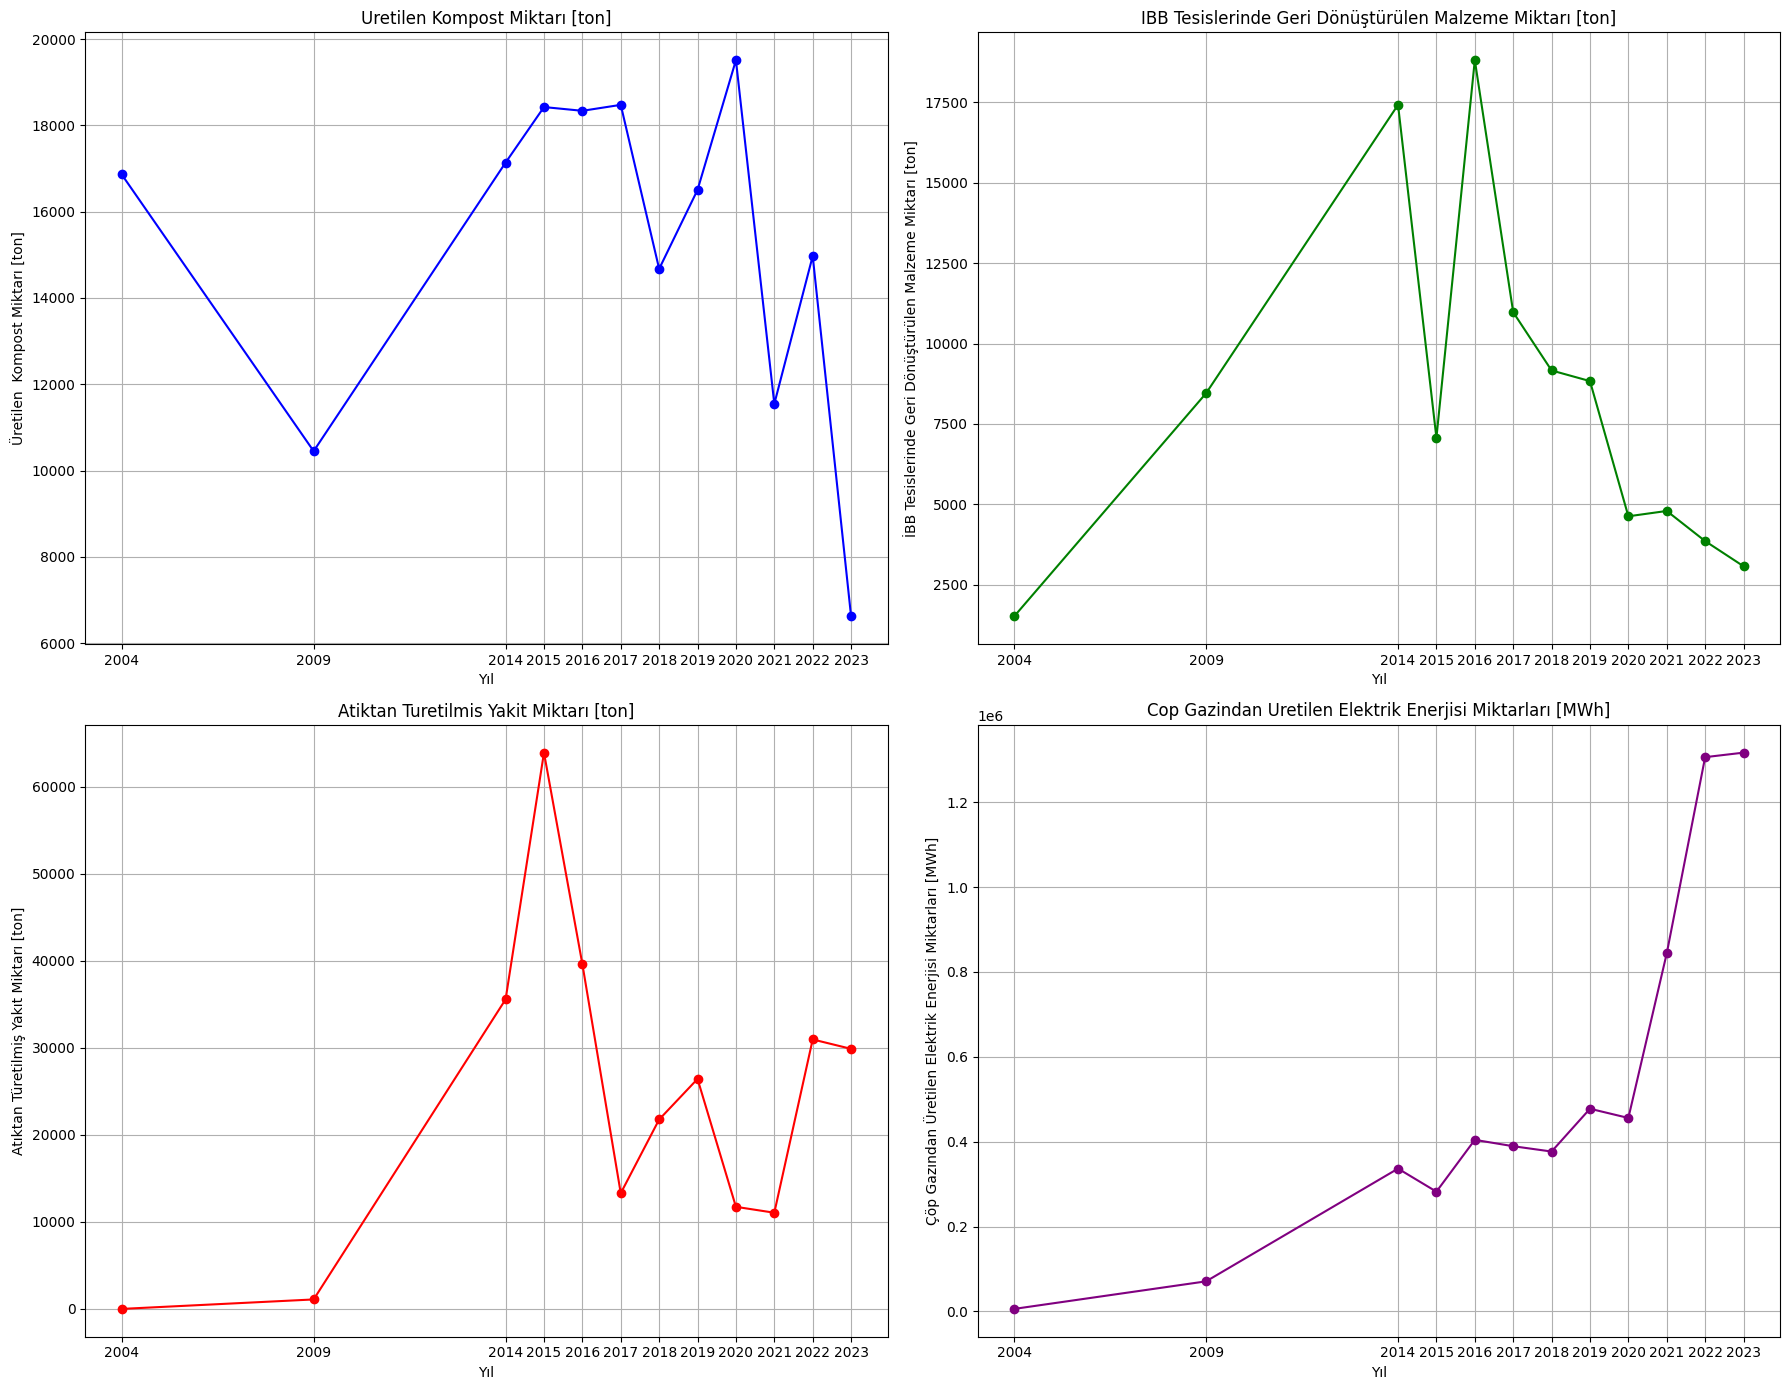

In [63]:
# ilk sütunu x ekseni olarak kullanarak dört ayrı grafik çizelim
plt.figure(figsize=(18,14))#boyutlar inch cinsinden çizimler olur
#genişlik 20 inch ,yükseklik 18 inch
#genişlik 20 inch =20* 2.54cm = 50.8cm
#yükseklik 18 inch =18* 2.54 = 45.72cm


#kompost miktar grafiği
# kompost,organik maddelerin daha basit organik ve inorganik maddelere ayrıştırılması işlemidir

plt.subplot(2, 2, 1)
plt.plot(yil_bilgisi, kompost_miktari, marker='o', color='blue')
plt.title('Uretilen Kompost Miktarı [ton]')
plt.xlabel('Yıl')
plt.ylabel(oku.columns[2])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Geri Dönüştürülen Malzeme Miktarı Grafiği
plt.subplot(2, 2, 2)
plt.plot(yil_bilgisi, geri_donusturulen_malzeme_miktari, marker='o', color='green')
plt.title('IBB Tesislerinde Geri Dönüştürülen Malzeme Miktarı [ton]')
plt.xlabel('Yıl')
plt.ylabel(oku.columns[3])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Atıktan Türetilmiş Yakıt Miktarı Grafiği
plt.subplot(2, 2, 3)
plt.plot(yil_bilgisi, atik_yakit_miktari, marker='o', color='red')
plt.title('Atiktan Turetilmis Yakit Miktarı [ton]')
plt.xlabel('Yıl')
plt.ylabel(oku.columns[4])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Çöp Gazından Üretilen Elektrik Enerjisi Miktarları Grafiği
plt.subplot(2, 2, 4)
plt.plot(yil_bilgisi, elektrik_enerjisi_miktari, marker='o', color='purple')
plt.title('Cop Gazindan Uretilen Elektrik Enerjisi Miktarları [MWh]')
plt.xlabel('Yıl')
plt.ylabel(oku.columns[5])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Grafikleri yerleştir ve göster
plt.tight_layout()
plt.show()

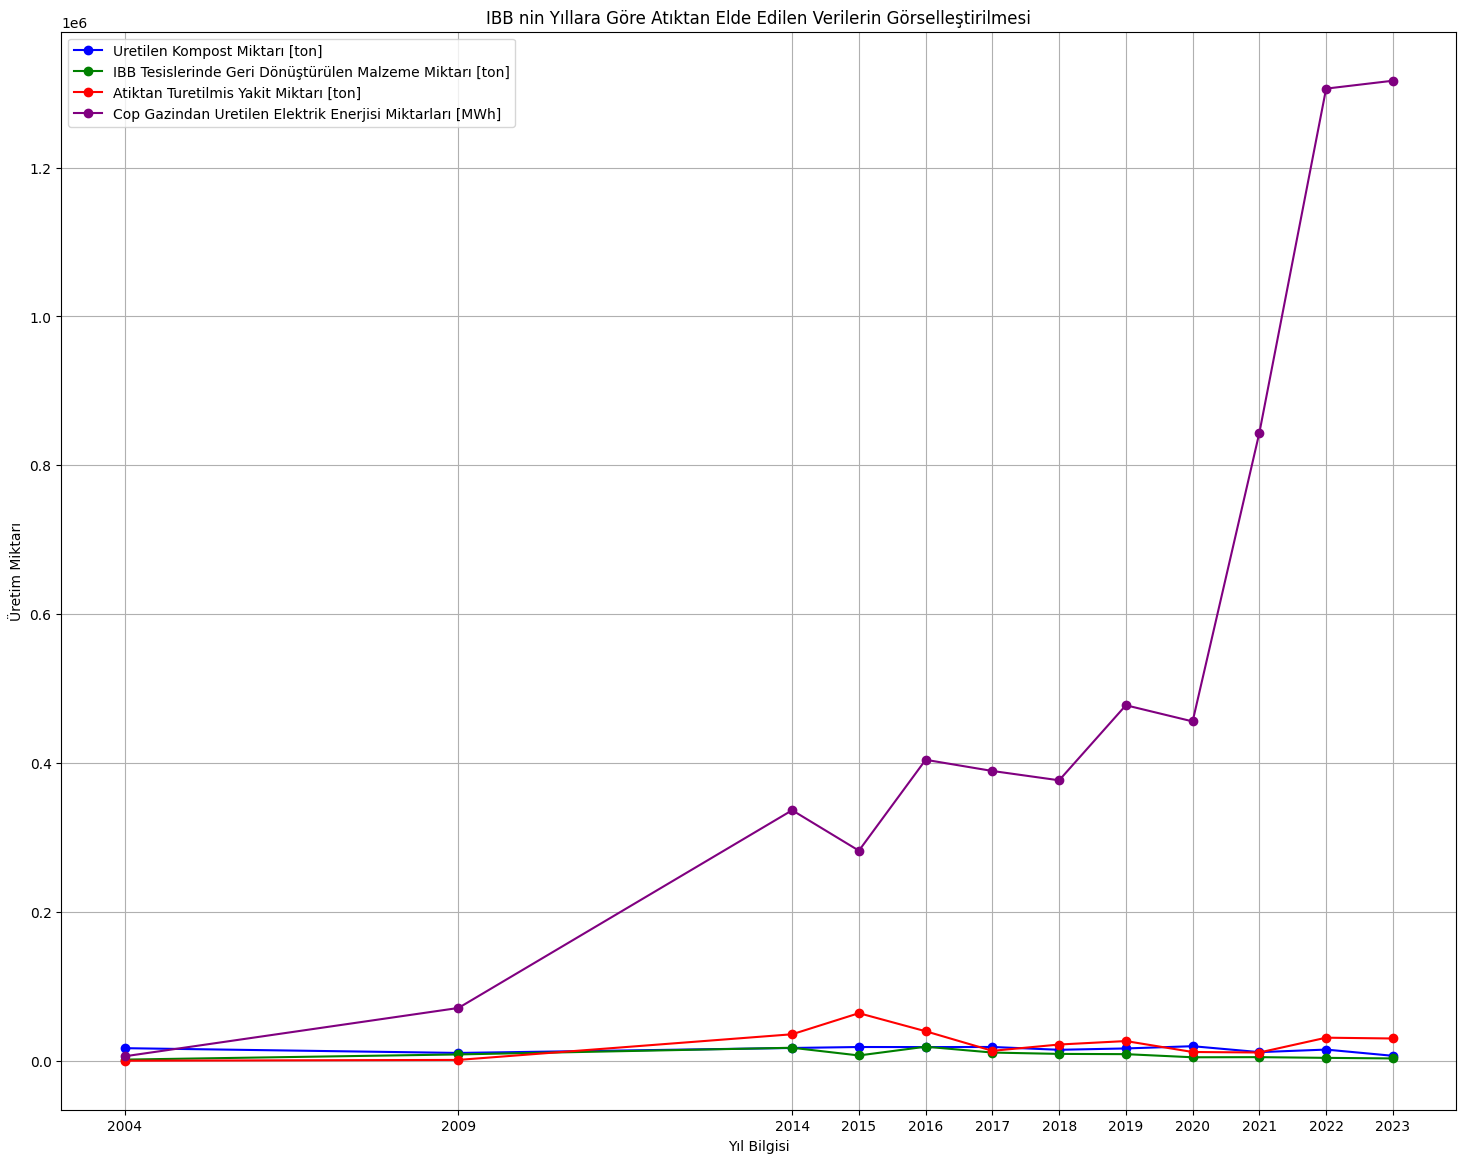

In [65]:
plt.figure(figsize=(18, 14))

plt.plot(yil_bilgisi, kompost_miktari, marker='o', label=oku.columns[2], color='blue')
plt.plot(yil_bilgisi, geri_donusturulen_malzeme_miktari, marker='o', label=oku.columns[3], color='green')
plt.plot(yil_bilgisi, atik_yakit_miktari, marker='o', label=oku.columns[4], color='red')
plt.plot(yil_bilgisi, elektrik_enerjisi_miktari, marker='o', label=oku.columns[5], color='purple')

# Grafiği özelleştir
plt.title('IBB nin Yıllara Göre Atıktan Elde Edilen Verilerin Görselleştirilmesi')
plt.xlabel('Yıl Bilgisi')
plt.ylabel('Üretim Miktarı')
plt.xticks(yil_bilgisi)
#plt.legend()
plt.legend(["Uretilen Kompost Miktarı [ton]", "IBB Tesislerinde Geri Dönüştürülen Malzeme Miktarı [ton]", "Atiktan Turetilmis Yakit Miktarı [ton]", "Cop Gazindan Uretilen Elektrik Enerjisi Miktarları [MWh]"])
plt.grid(True)

# Grafiği göster
plt.show()

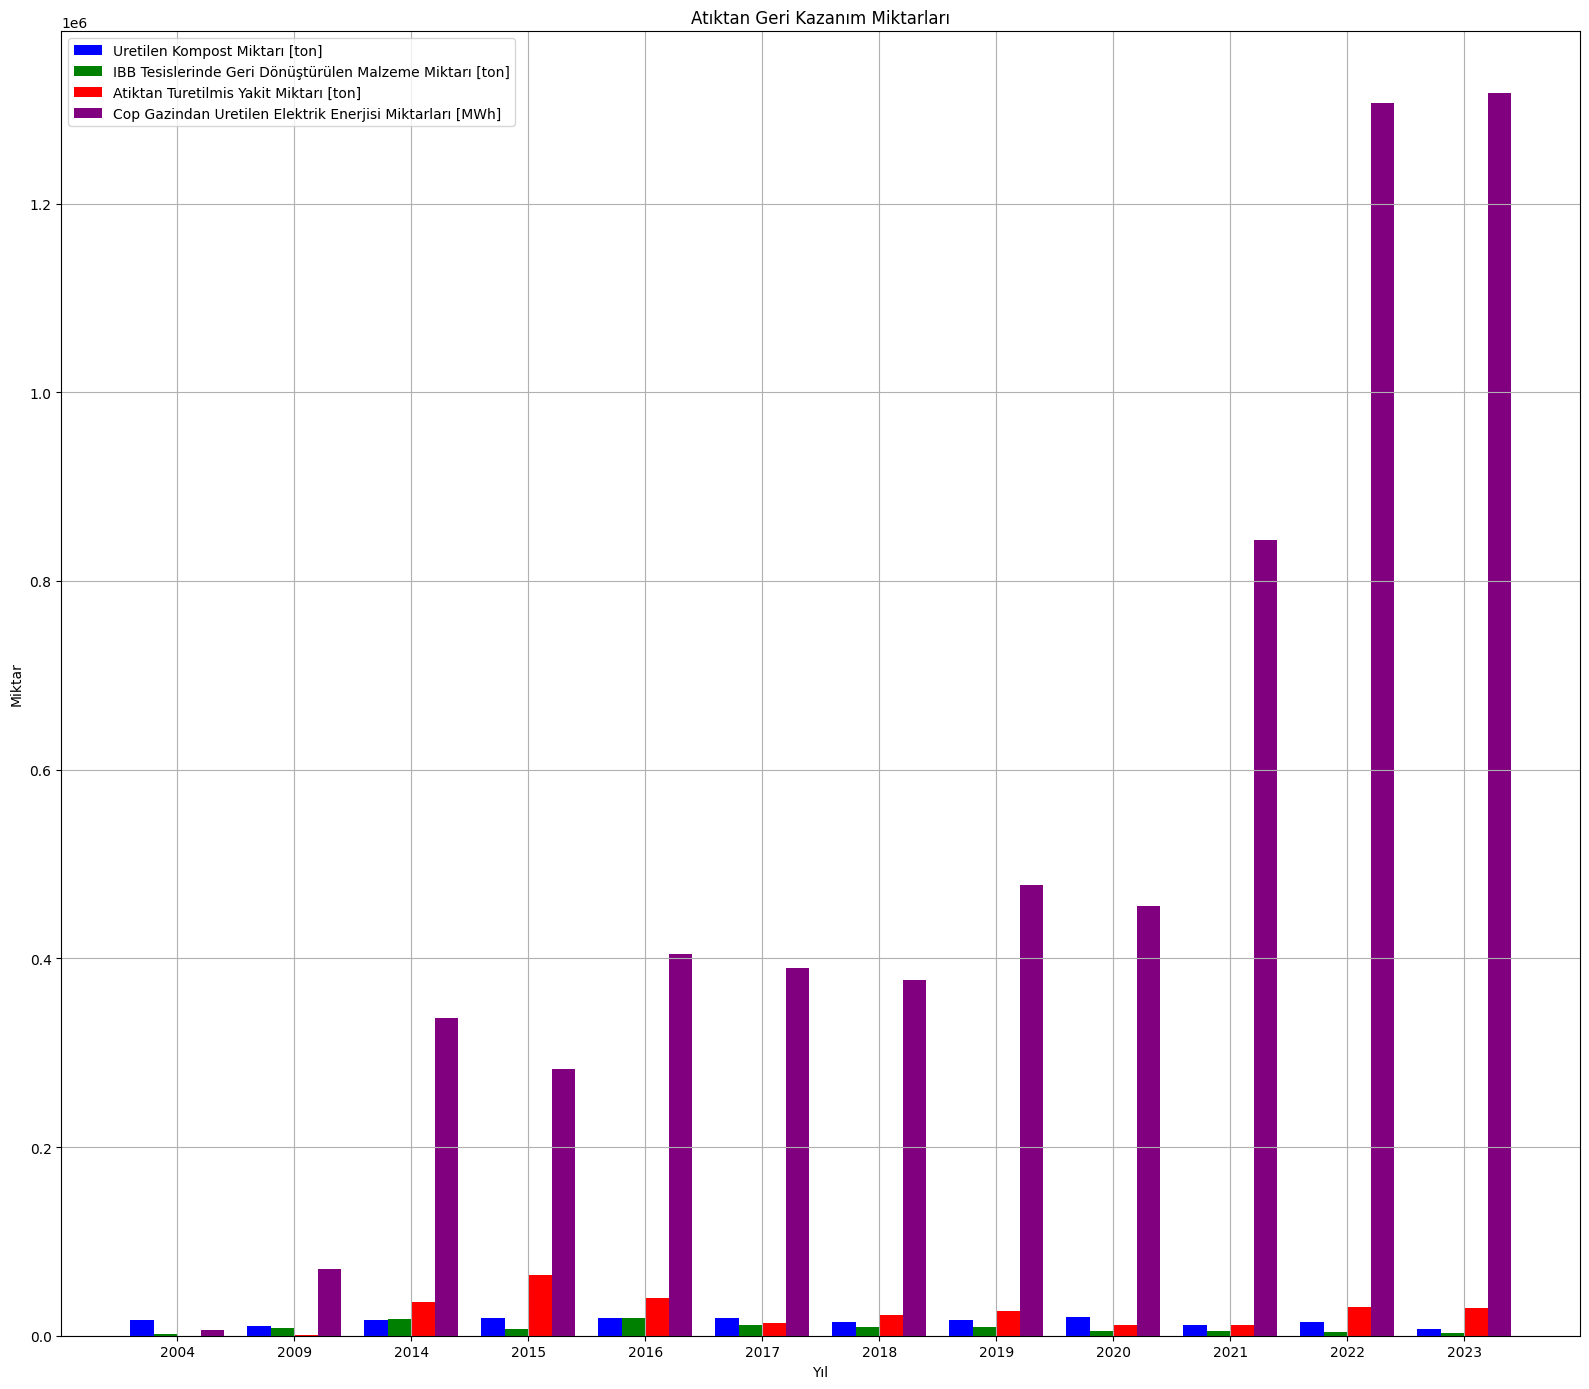

In [68]:
bar_width = 0.2
index = range(len(yil_bilgisi))

plt.figure(figsize=(16, 14))

# Kompost Miktarı Bar Plot
plt.bar(index, kompost_miktari, bar_width, label=oku.columns[1], color='blue')

# Geri Dönüştürülen Malzeme Miktarı Bar Plot
plt.bar([i + bar_width for i in index], geri_donusturulen_malzeme_miktari, bar_width, label=oku.columns[2], color='green')

# Atıktan Türetilmiş Yakıt Miktarı Bar Plot
plt.bar([i + 2 * bar_width for i in index], atik_yakit_miktari, bar_width, label=oku.columns[3], color='red')

# Çöp Gazından Üretilen Elektrik Enerjisi Miktarı Bar Plot
plt.bar([i + 3 * bar_width for i in index], elektrik_enerjisi_miktari, bar_width, label=oku.columns[4], color='purple')

# X eksenini belirli yıllara ayarla
plt.xlabel('Yıl')
plt.ylabel('Miktar')
plt.title('Atıktan Geri Kazanım Miktarları')
plt.xticks([i + 1.5 * bar_width for i in index], yil_bilgisi)
plt.legend(["Uretilen Kompost Miktarı [ton]", "IBB Tesislerinde Geri Dönüştürülen Malzeme Miktarı [ton]", "Atiktan Turetilmis Yakit Miktarı [ton]", "Cop Gazindan Uretilen Elektrik Enerjisi Miktarları [MWh]"])
plt.grid(True)

plt.tight_layout()
plt.show()